# Feedforward Neural Networks

# Case Study | Fuel Economics with Auto MPG

## pipeline for this case
### 1. Initial Installs and Imports libraries
### 2. Downloading the Auto MPG Data
### 3. Data Preparation
    - Attribute Information
    - DataFrame Creation
    - Dropping Null Values
    - Handling Categorical Variables (Dummy Variable)
    - Splitting Auto MPG for Training and Testing
### 4. Model Building and Training
    - Tensorflow Imports
    - Model build with Sequential API
    - Model Configuration
### 5. Evaluating the Results (TensorFlow Docs library)
### 6. Making Predictions with a New Observation

## 0. Libraries will utilize in this case study.

In [1]:
# Import the initial libraries to be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print("The version of Tensorflow: {}".format(tf.__version__))

The version of Tensorflow: 2.4.1


## 1. Downloading the Auto MPG Data

## 2. Data Preparation for model

In [2]:
column_names = ['mpg', 'cylinders', 'displacement', 'HP', 'weight', 'acceleration', 'modelyear', 'origin']
df = pd.read_csv("./dataset/auto-mpg.data", sep=" ", comment='\t', names=column_names,
                 na_values = '?', skipinitialspace=True)
df.head()

,mpg,cylinders,displacement,HP,weight,acceleration,modelyear,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [3]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
HP              6
weight          0
acceleration    0
modelyear       0
origin          0
dtype: int64

In [4]:
df = df.dropna() # Drop null values
df = df.reset_index(drop=True) # Reset index to tidy up the dataset
df.tail()

,mpg,cylinders,displacement,HP,weight,acceleration,modelyear,origin
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1
391,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
HP              0
weight          0
acceleration    0
modelyear       0
origin          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   HP            392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 24.6 KB


In [7]:
def one_hot_origin_encoder(df):
  df_copy = df.copy()
  df_copy['EU']=df_copy['origin'].map({1:0,2:1,3:0})
  df_copy['Japan']=df_copy['origin'].map({1:0,2:0,3:1})
  df_copy = df_copy.drop('origin',axis=1)
  return df_copy

df_clean = one_hot_origin_encoder(df)
df_clean.head()

,mpg,cylinders,displacement,HP,weight,acceleration,modelyear,EU,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0


In [8]:
# For Training
train = df_clean.sample(frac=0.8,random_state=0)
train_x = train.drop('mpg',axis=1)
train_y = train['mpg']
# For Testing
test = df_clean.drop(train.index)
test_x = test.drop('mpg',axis=1)
test_y = test['mpg']

In [9]:
train_stats = train_x.describe().transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
HP,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
modelyear,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
EU,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [10]:
# Feature scaling with the mean and std. dev. values in train_stats
def normalizer(x):
  return (x - train_stats['mean']) / train_stats['std']

train_x_scaled = normalizer(train_x)
test_x_scaled = normalizer(test_x)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 905
Trainable params: 905
Non-trainable params: 0
_________________________________________________________________


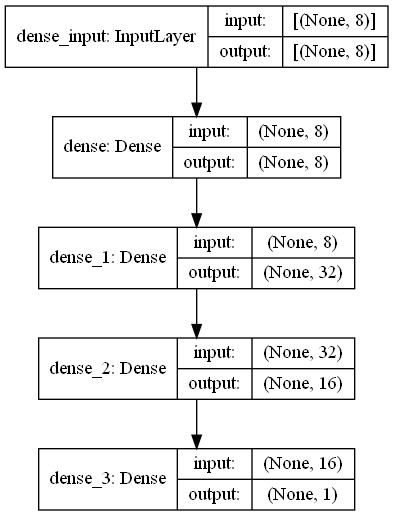

In [11]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# TensorFlow Docs Imports for Evaluation
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Dense(8,activation=tf.nn.relu, input_shape= [train_x.shape[1]])), 
model.add(Dense(32,activation=tf.nn.relu)),
model.add(Dense(16,activation=tf.nn.relu)),
model.add(Dense(1))

model.summary()
tf.keras.utils.plot_model(model, show_shapes=True)

In [12]:
# Optimizer, Cost, and Metric Configuration
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mse','mae'])

In [13]:
# Early Stop Configuration
early_stop=tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=50)

In [14]:
# Fitting the Model and Saving the Callback Histories
history=model.fit(x=train_x_scaled, y=train_y,
                  epochs=1000, 
                  validation_split = 0.2,
                  verbose=0,
                  callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:585.5046,  mae:22.9622,  mse:585.5046,  val_loss:603.9026,  val_mae:23.3272,  val_mse:603.9026,  
....................................................................................................
Epoch: 100, loss:10.2625,  mae:2.2948,  mse:10.2625,  val_loss:9.8946,  val_mae:2.3340,  val_mse:9.8946,  
....................................................................................................
Epoch: 200, loss:8.0139,  mae:2.0240,  mse:8.0139,  val_loss:9.4530,  val_mae:2.3089,  val_mse:9.4530,  
........

In [16]:
type(history)

tensorflow.python.keras.callbacks.History

Text(0, 0.5, 'MAE [mpg]')

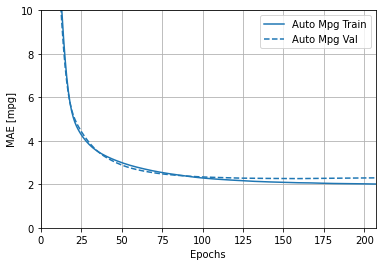

In [17]:
plot_obj = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plot_obj.plot({'Auto MPG': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [mpg]')

In [18]:
loss,mae,mse=model.evaluate(test_x_scaled, test_y, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.8417 - mse: 6.8417 - mae: 2.0164
Testing set Mean Abs Error:  6.84 MPG


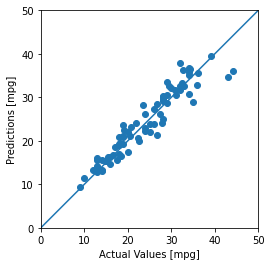

In [19]:
test_preds = model.predict(test_x_scaled).flatten()

evaluation_plot = plt.axes(aspect='equal')
plt.scatter(test_y, test_preds)#Scatter Plot
plt.ylabel('Predictions [mpg]')#Y for Predictions
plt.xlabel('Actual Values [mpg]')#X for Actual Values
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.plot([0, 50], [0, 50]) #line plot for comparison

Text(0, 0.5, 'Count')

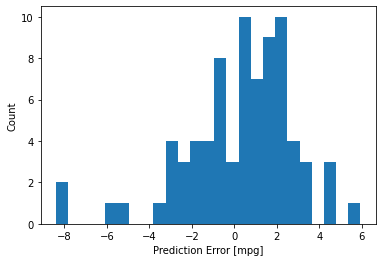

In [20]:
error = test_preds - test_y
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [mpg]")
plt.ylabel("Count")

In [21]:
# Prediction for Single Observation
# What is the MPG of a car with the following info:
new_car = pd.DataFrame([[8, #cylinders
                         307.0, #displacement
                         130.0, #HP
                         5504.0, #weight
                         12.0, #acceleration
                         70, #modelyear
                         1 #origin
                         ]], columns=column_names[1:])

new_car

,cylinders,displacement,HP,weight,acceleration,modelyear,origin
0,8,307.0,130.0,5504.0,12.0,70,1


In [22]:
new_car = normalizer(one_hot_origin_encoder(new_car))
new_car_mpg = model.predict(new_car).flatten()
print('The predicted miles per gallon value for this car is:',new_car_mpg)

The predicted miles per gallon value for this car is: [13.244547]
